In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
app_train = pd.read_csv('./data/application_train.csv')

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#檢視整數有哪些欄位
app_train.select_dtypes(include=["int64"]).head(10)

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,100008,0,0,-16941,-1588,-477,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,100009,0,1,-13778,-3130,-619,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
7,100010,0,0,-18850,-449,-2379,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
8,100011,0,0,-20099,365243,-3514,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,100012,0,0,-14469,-2019,-3992,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#檢視浮點數有哪些欄位
app_train.select_dtypes(include=["float64"]).head(10)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,99000.0,490495.5,27517.5,454500.0,0.035792,-4970.0,NaN,2.0,NaN,0.354225,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,171000.0,1560726.0,41301.0,1395000.0,0.035792,-1213.0,17.0,3.0,0.774761,0.724000,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,360000.0,1530000.0,42075.0,1530000.0,0.003122,-4597.0,8.0,2.0,NaN,0.714279,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,112500.0,1019610.0,33826.5,913500.0,0.018634,-7427.0,NaN,2.0,0.587334,0.205747,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,135000.0,405000.0,20250.0,405000.0,0.019689,-14437.0,NaN,1.0,NaN,0.746644,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#將DAYS_BIRTH計算為年紀
app_train['AGE']=app_train['DAYS_BIRTH']//-365
app_train['AGE'].head(10)

0    25
1    45
2    52
3    52
4    54
5    46
6    37
7    51
8    55
9    39
Name: AGE, dtype: int64

In [7]:
#對收入、信用額度、年紀有興趣，檢視其統計資訊
COL_LIST=['AMT_INCOME_TOTAL','AMT_CREDIT','AGE']
app_train[COL_LIST].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AGE
count,3.075110e+05,3.075110e+05,307511.000000
mean,1.687979e+05,5.990260e+05,43.435968
std,2.371231e+05,4.024908e+05,11.954593
min,2.565000e+04,4.500000e+04,20.000000
25%,1.125000e+05,2.700000e+05,34.000000
50%,1.471500e+05,5.135310e+05,43.000000
75%,2.025000e+05,8.086500e+05,53.000000
max,1.170000e+08,4.050000e+06,69.000000


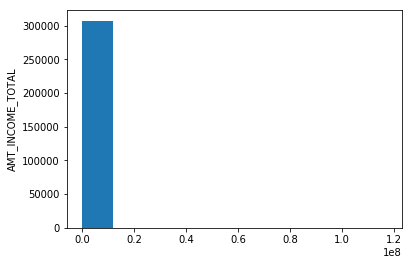

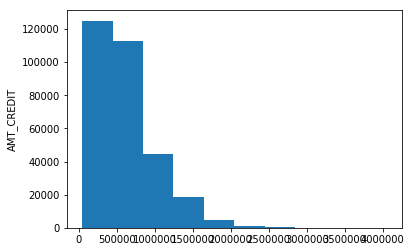

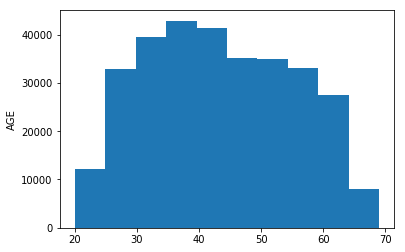

In [8]:
#檢視個欄位直方圖
for i in COL_LIST:
    plt.figure()
    plt.hist(app_train[i],bins=10)
    plt.ylabel(i)
plt.show()

上圖可發現收入有離群值，因此集中在左邊；
信用額度則是右尾分布；
年齡接近常態分布

Text(0,0.5,'AMT_INCOME_TOTAL')

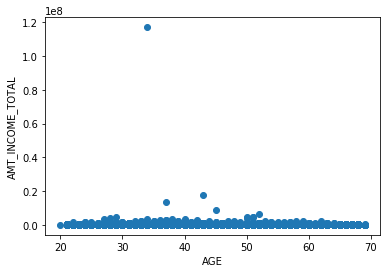

In [9]:
#檢視各種欄位之關係(散佈圖)
plt.scatter(app_train['AGE'],app_train['AMT_INCOME_TOTAL'])
plt.xlabel('AGE')
plt.ylabel('AMT_INCOME_TOTAL')

Text(0,0.5,'AMT_CREDIT')

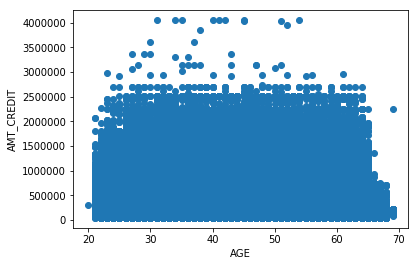

In [10]:
plt.scatter(app_train['AGE'],app_train['AMT_CREDIT'])
plt.xlabel('AGE')
plt.ylabel('AMT_CREDIT')

Text(0,0.5,'AMT_CREDIT')

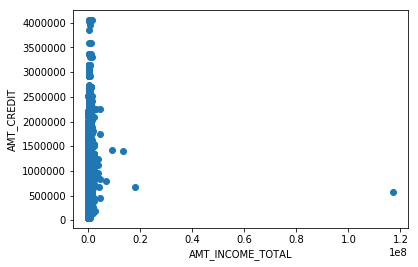

In [11]:
plt.scatter(app_train['AMT_INCOME_TOTAL'],app_train['AMT_CREDIT'])
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')

由上可發現收入有離群值，較無法檢視x y之關係，需先把離群值排除；
年紀與信用額度則無特別線性關係